In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

%matplotlib inline

In [3]:
cheetah = io.imread('cheetah.jpeg')
lion = io.imread('lion.jpg')
df = pd.DataFrame(['cheetah', 'lion'], columns=['Image'])

print(cheetah.shape, lion.shape)

(155, 326, 3) (1080, 1920, 3)


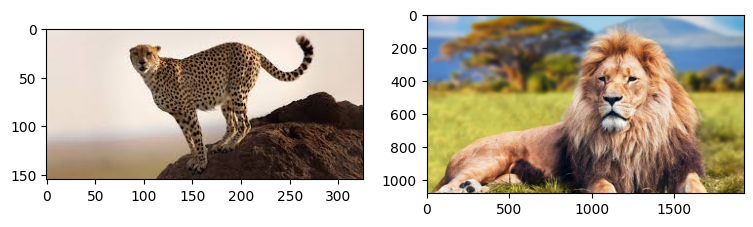

In [4]:
fig = plt.figure(figsize=(9, 3))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(cheetah)
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(lion)

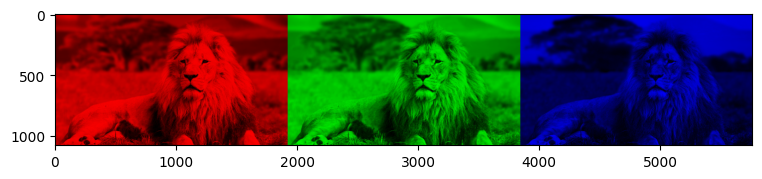

In [5]:
lion_r = lion.copy()
lion_r[:, :, 1] = lion_r[:, :, 2] =  0

lion_g = lion.copy()
lion_g[:, :, 0] = lion_g[:, :, 2] =  0

lion_b = lion.copy()
lion_b[:, :, 0] = lion_b[:, :, 1] =  0

plot_image = np.concatenate((lion_r, lion_g, lion_b), axis=1)
plt.figure(figsize=(9, 3))
plt.imshow(plot_image)

In [6]:
lion_r[:, :, 0]

array([[199, 199, 199, ..., 138, 138, 138],
       [198, 198, 198, ..., 138, 138, 138],
       [198, 198, 198, ..., 138, 138, 138],
       ...,
       [209, 207, 203, ..., 211, 181, 154],
       [209, 207, 203, ..., 190, 161, 130],
       [209, 207, 203, ..., 141, 128, 107]], dtype=uint8)

In [7]:
from skimage.color import rgb2gray

cgs = rgb2gray(cheetah)
lgs = rgb2gray(lion)

print('Image shape:', cgs.shape)

Image shape: (155, 326)


In [8]:
print('2D image pixel map')
print(np.round(cgs, 2))

2D image pixel map
[[0.89 0.89 0.89 ... 0.84 0.84 0.84]
 [0.89 0.89 0.89 ... 0.84 0.84 0.84]
 [0.89 0.89 0.89 ... 0.84 0.84 0.84]
 ...
 [0.52 0.52 0.52 ... 0.32 0.3  0.24]
 [0.52 0.52 0.52 ... 0.31 0.33 0.24]
 [0.52 0.52 0.52 ... 0.23 0.3  0.28]]


In [9]:
print('Flattened pixel map')  
print(np.round(cgs.flatten(), 2)) 

Flattened pixel map
[0.89 0.89 0.89 ... 0.23 0.3  0.28]


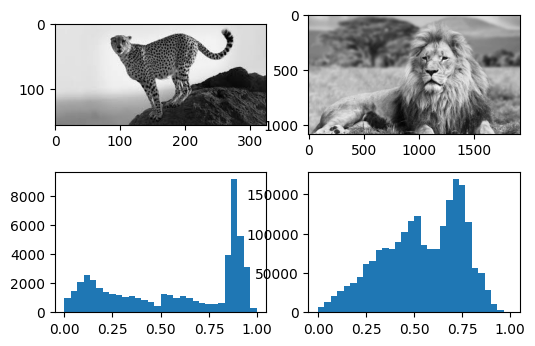

In [10]:
fig = plt.figure(figsize=(6, 4))
ax1 = fig.add_subplot(2, 2, 1)
ax1.imshow(cgs, cmap='gray')
ax2 = fig.add_subplot(2, 2, 2)
ax2.imshow(lgs, cmap='gray')
ax3 = fig.add_subplot(2, 2, 3)
p_freq, p_bins, c_patches = ax3.hist(cgs.flatten(), bins=30)
ax4 = fig.add_subplot(2, 2, 4)  
l_freq, l_bins, c_patches = ax4.hist(lgs.flatten(), bins=30)

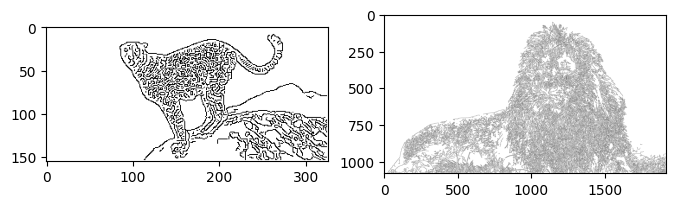

In [11]:
from skimage.feature import canny

cheetah_edges = canny(cgs, sigma=1)
lion_edges = canny(lgs, sigma=1)

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(cheetah_edges, cmap='binary')
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(lion_edges, cmap='binary')





(155, 326)


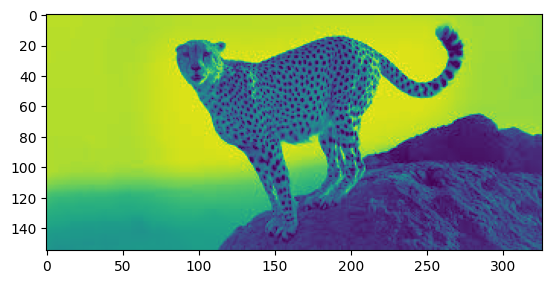

In [12]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('cheetah.jpeg', 0)
plt.imshow(image)
print(image.shape)

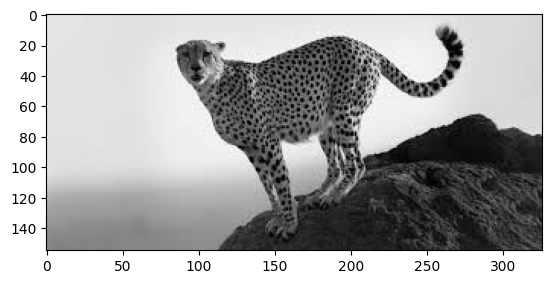

In [13]:
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img)

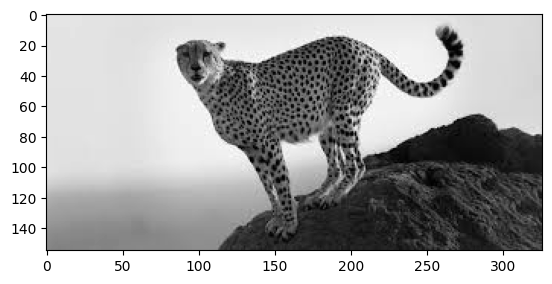

In [14]:
im = cv2.imread('cheetah.jpeg', 0)
plt.imshow(im, cmap='gray')


(<Axes: title={'center': 'Vertical image'}>,
 Text(0.5, 1.0, 'Vertical image'))

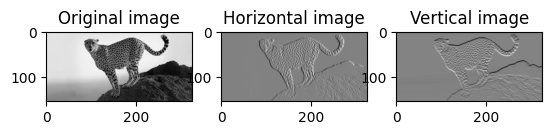

In [15]:
img1 = cv2.Sobel(im, cv2.CV_64F, 1, 0, 5)
img2 = cv2.Sobel(im, cv2.CV_64F, 0, 1, 5)

plt.subplot(1, 3, 1), plt.imshow(im, cmap='gray'), plt.title('Original image')
plt.subplot(1, 3, 2), plt.imshow(img1, cmap='gray'), plt.title('Horizontal image')
plt.subplot(1, 3, 3), plt.imshow(img2, cmap='gray'), plt.title('Vertical image')



Text(0.5, 1.0, 'Laplacian Image')

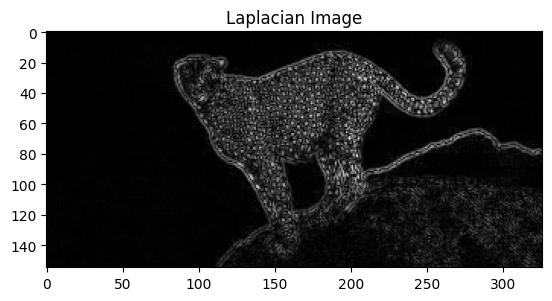

In [16]:
blurred = cv2.GaussianBlur(image,(3,3),0)
laplacian = cv2.Laplacian(blurred,cv2.CV_64F)
laplacian_abs = cv2.convertScaleAbs(laplacian)
plt.imshow(laplacian_abs, cmap ="gray")
plt.title("Laplacian Image")
